In [1]:
'''
Date: 5/Aug/2023
Auther: Yike Xie
Content: Exclude patient 1_075: Figure 1 in dengue paper
'''

'\nDate: 5/Aug/2023\nAuther: Yike Xie\nContent: Exclude patient 1_075: Figure 1 in dengue paper\n'

In [2]:
import os

import numpy as np
import pandas as pd

import anndata
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns

from collections import defaultdict
import random
import itertools
from numpy import *    

In [3]:
import sys
sys.path.append('/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/') 
import YK_util, optimized_pair_comparison, functions_CCC_figure_fra_pair
from YK_util import *
from optimized_pair_comparison import *
from functions_CCC_figure_fra_pair import *

In [33]:
# make intermediate monocytes darker

def load_cst_palette():
    cst_colors = {'memory B cells': (1.0, 0.0, 0.0),
                 'naive B cells': (0.7372549019607844, 0.5607843137254902, 0.5607843137254902),
                 'activated B cells': (0.5019607843137255, 0.0, 0.0),
                  
                 'proliferating plasmablasts': (1.0, 0.8941176470588236, 0.7686274509803922),
                 'non-proliferating plasmablasts': (1.0, 0.5490196078431373, 0.0),
                  
                 'CD4+ naive T cells': (0.6901960784313725, 0.7686274509803922, 0.8705882352941177),
                 'CD4+ memory T cells': (0.4392156862745098, 0.5019607843137255, 0.5647058823529412), # slategrey
                 'CD8+ naive T cells': (0.0, 0.0, 0.5019607843137255),
                 'CD8+ effector memory T cells': (0.2549019607843137, 0.4117647058823529, 0.8823529411764706),
                 'CD8+ exhausted T cells': (0.0, 0.7490196078431373, 1.0),# indigo
                 'Tregs': (0.0, 1.0, 1.0),#cyan
                 'MAIT': (0.37254901960784315, 0.6196078431372549, 0.6274509803921569),#cadetblue
                  
                 'signaling NK cells': (0.5019607843137255, 0.0, 0.5019607843137255),
                 'cytotoxic NK cells': (0.8666666666666667, 0.6274509803921569, 0.8666666666666667),
                 'proliferating NK cells': (1.0, 0.0, 1.0),

                 'classical monocytes': (0.5607843137254902, 0.7372549019607844, 0.5647058823529412),
                 'non-classical monocytes': (0.5647058823529412, 0.9333333333333333, 0.2),
                 'intermediate monocytes': (0.0, 0.5019607843137255, 0.0),
                  
                 'cDC1': (1.0, 0.7529411764705882, 0.796078431372549),
                 'cDC2': (1.0, 0.0784313725490196, 0.5764705882352941),
                 'pDCs': (0.792156862745098, 0.5686274509803921, 0.3803921568627451),

                 'megakaryocytes': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)}
    
    return cst_colors

In [34]:
# load cell subtype palette
cst_palette = load_cst_palette()

In [35]:
sns.color_palette(list(cst_palette.values())[10:])

[(0.0, 1.0, 1.0),
 (0.37254901960784315, 0.6196078431372549, 0.6274509803921569),
 (0.5019607843137255, 0.0, 0.5019607843137255),
 (0.8666666666666667, 0.6274509803921569, 0.8666666666666667),
 (1.0, 0.0, 1.0),
 (0.5607843137254902, 0.7372549019607844, 0.5647058823529412),
 (0.5647058823529412, 0.9333333333333333, 0.2),
 (0.0, 0.5019607843137255, 0.0),
 (1.0, 0.7529411764705882, 0.796078431372549),
 (1.0, 0.0784313725490196, 0.5764705882352941),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [36]:
# load data
path = '/home/yike/phd/dengue/data/mergedata_luca_NKT_202206.h5ad'
adata = sc.read_h5ad(path)

adata_kid = subsetdata(adata)
adata_kid = normalizedata(adata_kid, log1p=True) # log1p = 2
adata_kid = removegenes(adata_kid)
adata_kid = adata_kid[(adata_kid.obs.cell_subtype_new != 'doublets') & 
                        (adata_kid.obs.cell_subtype_new != 'unknown')].copy()

sc.pp.filter_genes(adata_kid, min_cells=3)

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [37]:
#reorder some celltypes
reorg_data(adata_kid)

/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:172: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['cell_type_new'].cat.reorder_categories(group_order_primary, inplace=True)
/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:204: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['cell_subtype_new'].cat.reorder_categories(group_order_secondary, inplace=True)


In [38]:
#clustering
cluster (adata_kid)

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [39]:
# exclude 1_075_01
adata_kid = adata_kid[~ (adata_kid.obs['ID'] == '1_075_01')]

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [7]:
# X_umap = np.loadtxt('/home/yike/phd/dengue/dengue_children/paper_figures/final/references/Zhiyuan_refs/X_umap.txt')
# adata_kid.obsm['X_umap'] = X_umap
# adata_kid.write('/home/yike/phd/dengue/data/mergedata_20211001_kid_umap.h5ad')

In [40]:
#save path
save_figures = '/home/yike/phd/dengue/docs/paper_draft/figures/YK_figures/exclude_1_075_01/figure1'
save_tables = '/home/yike/phd/dengue/docs/paper_draft/tabels/exclude_1_075_01/'

In [41]:
# get cell types and cell subtypes
cell_types = adata_kid.obs['cell_type_new'].cat.categories.tolist()
cell_subtypes = adata_kid.obs['cell_subtype_new'].cat.categories.tolist()

In [10]:
# load cell type palette
ct_palette = load_ct_palette()
print([ct for ct in ct_palette.keys()])
sns.color_palette(ct_palette.values())

['B cells', 'Plasmablasts', 'T cells', 'NK cells', 'Monocytes', 'conventional DCs', 'plasmacytoid DCs', 'megakaryocytes']


[(0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [11]:
# load cell subtype palette
cst_palette = load_cst_palette()
print([cst for cst in cst_palette.keys()])
sns.color_palette(list(cst_palette.values())[:10])

['memory B cells', 'naive B cells', 'activated B cells', 'proliferating plasmablasts', 'non-proliferating plasmablasts', 'CD4+ naive T cells', 'CD4+ memory T cells', 'CD8+ naive T cells', 'CD8+ effector memory T cells', 'CD8+ exhausted T cells', 'Tregs', 'MAIT', 'signaling NK cells', 'cytotoxic NK cells', 'proliferating NK cells', 'classical monocytes', 'non-classical monocytes', 'intermediate monocytes', 'cDC1', 'cDC2', 'pDCs', 'megakaryocytes']


[(1.0, 0.0, 0.0),
 (0.7372549019607844, 0.5607843137254902, 0.5607843137254902),
 (0.5019607843137255, 0.0, 0.0),
 (1.0, 0.8941176470588236, 0.7686274509803922),
 (1.0, 0.5490196078431373, 0.0),
 (0.6901960784313725, 0.7686274509803922, 0.8705882352941177),
 (0.4392156862745098, 0.5019607843137255, 0.5647058823529412),
 (0.0, 0.0, 0.5019607843137255),
 (0.2549019607843137, 0.4117647058823529, 0.8823529411764706),
 (0.0, 0.7490196078431373, 1.0)]

In [12]:
sns.color_palette(list(cst_palette.values())[10:])

[(0.0, 1.0, 1.0),
 (0.37254901960784315, 0.6196078431372549, 0.6274509803921569),
 (0.5019607843137255, 0.0, 0.5019607843137255),
 (0.8666666666666667, 0.6274509803921569, 0.8666666666666667),
 (1.0, 0.0, 1.0),
 (0.5607843137254902, 0.7372549019607844, 0.5607843137254902),
 (0.5647058823529412, 0.9333333333333333, 0.5647058823529412),
 (0.0, 0.5019607843137255, 0.0),
 (1.0, 0.7529411764705882, 0.796078431372549),
 (1.0, 0.0784313725490196, 0.5764705882352941),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [42]:
def umap_plot(adata, path, group, color_map, title, filetype=False, annotation=False, **kwargs):
    rcParams['figure.figsize']=(7,7)
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"
    
    temp = adata[(adata.obs[group] != 'unknown') & (adata.obs[group] != 'doublets')].copy()
    
    fig, ax = plt.subplots()
    if annotation == False:
        sc.pl.umap(temp, color=group, palette = color_map, ax=ax, show=False, title = title, size=20, **kwargs)
        ax.legend(markerscale = 3, fontsize = 16, bbox_to_anchor=(1, 1), frameon = False)
    elif annotation == True:
        temp.obs['umap'] = temp.obs[group]
        ct_rep = {'B cells': 'B',
                  'Plasmablasts': 'Plasmablasts',
                  'T cells': 'T',
                  'NK cells': 'NK',
                  'Monocytes': 'Monocytes',
                  'conventional DCs': 'cDCs',
                  'plasmacytoid DCs': 'pDCs',
                  'megakaryocytes': 'mega'}
        cst_rep = {cst: str(n + 1) for cst, n in zip(cell_subtypes, range(len(cell_subtypes)))}
        temp.obs['umap'].replace([ct_rep, cst_rep][group != 'cell_type_new'], inplace=True)
        
        reorder_list = [[ct_rep[ct] for ct in cell_types], [cst_rep[cst] for cst in cell_subtypes]]
        temp.obs.umap = temp.obs.umap.astype('category')
        temp.obs.umap.cat.reorder_categories(reorder_list[group != 'cell_type_new'], 
            inplace = True)

        sc.pl.umap(temp, color='umap', palette = color_map, ax=ax, show=False, title = title, size=20,
                   legend_loc='on data', legend_fontweight = 'bold', **kwargs)
        
    if filetype is not False:
        name = 'umap_' + group + '.' + filetype
        fig.savefig(os.path.join(path, name), bbox_inches='tight')
        
    return {'xlim': ax.get_xlim(), 'ylim': ax.get_ylim()}

def umap_plot_2(adata, path, group, color_map, title, xlim, ylim, filetype=False):
    rcParams['figure.figsize']=(7,7)
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"

    temp = adata[(adata.obs[group] != 'unknown') & (adata.obs[group] != 'doublets')].copy()
    temp.obs['umap'] = temp.obs[group]
    cst_rep = {cst: str(n + 1) for cst, n in zip(cell_subtypes, range(len(cell_subtypes)))}
    temp.obs['umap'].replace(cst_rep, inplace=True)
        
    fig, ax = plt.subplots()
    sc.pl.umap(temp, color='umap', palette = color_map, ax=ax, show=False, title = title, size=5,
               legend_loc='on data', legend_fontweight = 'normal', legend_fontsize = 16)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    if filetype is not False:
        name = 'umap_' + group + '_' + title + '.' + filetype
        fig.savefig(os.path.join(path, name), bbox_inches='tight')
        
    
def dotplot(adata, path, marker_genes):
    rcParams['pdf.fonttype'] = 42
    rcParams['font.size'] = 18
    rcParams['figure.dpi'] = 300

    fig, ax = plt.subplots(figsize = (16, 9.5))
    axs = sc.pl.dotplot(adata_kid, marker_genes, groupby='cell_subtype_new', cmap = 'viridis', 
                      use_raw=False, show=False, ax=ax,
                      colorbar_title = 'Mean exp\n(cpm)',
                      size_title = 'Frac of cells\n(%)')

    lims = axs['color_legend_ax'].get_xlim()
    axs['color_legend_ax'].remove()

    norm = mpl.colors.Normalize(lims[0], lims[1])
    cmap = plt.cm.get_cmap('viridis')
    axs['color_legend_ax'] = fig.add_axes([0.82, 0.5, 0.1, 0.05])
    cbar = mpl.colorbar.ColorbarBase(axs['color_legend_ax'], norm=norm, cmap=cmap, orientation='horizontal')
    cbar.set_ticks([0, np.log2(10), np.log2(100), np.log2(1000), np.log2(10000)])
    cbar.set_ticklabels(['0', '$10$', '$10^2$', '$10^3$', '$10^4$'])
    cbar.ax.tick_params(labelsize=15)
    axs['color_legend_ax'].set_title('Mean exp\n(cpm)', fontsize=15)
    plt.show()
    
    fig.savefig(os.path.join(path, 'dotplot.png'), bbox_inches='tight')
    fig.savefig(os.path.join(path, 'dotplot.pdf'), bbox_inches='tight')
    
def umap_virus(adata, path, group, filetype=False, **kwargs):
    rcParams['figure.figsize']=(7,7)
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"
    
    temp = adata[(adata.obs[group] != 'unknown') & (adata.obs[group] != 'doublets')].copy()
    
    fig, ax = plt.subplots()
    axs = sc.pl.umap(adata, color=group, show=False, 
                   use_raw=False, size=20, ax=ax)
    fig = plt.gcf()
    ax_all = fig.get_axes()

    cbar_old = ax_all[-1]
    lims = cbar_old.get_xlim()
    cbar_old.remove()

    norm = mpl.colors.Normalize(lims[0], lims[1])
    cmap = plt.cm.get_cmap('viridis')
    ax_all.append(fig.add_axes([0.85, 0.3, 0.03, 0.4]))
    cbar = mpl.colorbar.ColorbarBase(ax_all[-1], norm=norm, cmap=cmap, orientation='vertical')
    cbar.set_ticks([0, np.log2(10), np.log2(100), np.log2(1000), np.log2(10000)])
    cbar.set_ticklabels(['0', '$10$', '$10^2$', '$10^3$', '$10^4$'])
    #cbar.ax.tick_params()
    ax_all[-1].set_ylabel('DENV/million reads')
    ax.set_title(None)
    
    if filetype is not False:
        name = 'umap_' + group +'.' + filetype
        fig.savefig(os.path.join(path, name), bbox_inches='tight')
        
    return {'xlim': ax.get_xlim(), 'ylim': ax.get_ylim()}

def umap_virus_new(adata, IDs, path, filetype=False, **kwargs):
    rcParams['figure.figsize']=(7,7)
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"
    
    temp = adata
    temp.obs['umap'] = 'non_vir'
    temp.obs.loc[~ temp.obs['ID'].isin(IDs), 'umap'] = 'vir'
    
    fig, ax = plt.subplots()
    sc.pl.umap(temp, color='umap', palette=['white', 'lightgray'], 
               ax=ax, size=20, show=False, alpha=0.3)
    ax.get_legend().remove()
    
    data_kid_3DWS = temp[temp.obs['ID'].isin(IDs)]
    sc.pl.umap(data_kid_3DWS, color='DENV_reads_nor', show=False, color_map='viridis_r',
                       use_raw=False, size=50, ax=ax, alpha=0.3)
    
    fig = plt.gcf()
    ax_all = fig.get_axes()

    cbar_old = ax_all[-1]
    lims = cbar_old.get_ylim()
    cbar_old.remove()

    norm = mpl.colors.Normalize(lims[0], lims[1])
    cmap = plt.cm.get_cmap('viridis_r')
    ax_all.append(fig.add_axes([0.85, 0.3, 0.03, 0.4]))
    cbar = mpl.colorbar.ColorbarBase(ax_all[-1], norm=norm, cmap=cmap, orientation='vertical')
    cbar.set_ticks([0, np.log2(10), np.log2(100), np.log2(1000), np.log2(10000)])
    cbar.set_ticklabels(['0', '$10$', '$10^2$', '$10^3$', '$10^4$'])
    #cbar.ax.tick_params()
    ax_all[-1].set_ylabel('DENV/million reads')
    ax.set_title(None)
    
    if filetype is not False:
        name = 'umap_nor_virus' +'.' + filetype
        fig.savefig(os.path.join(path, name), bbox_inches='tight')
        
    return {'xlim': ax.get_xlim(), 'ylim': ax.get_ylim()}

In [43]:
from matplotlib import rcParams

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


{'xlim': (-6.8842908382415775, 17.915667676925658),
 'ylim': (-7.701401281356811, 19.438222455978394)}

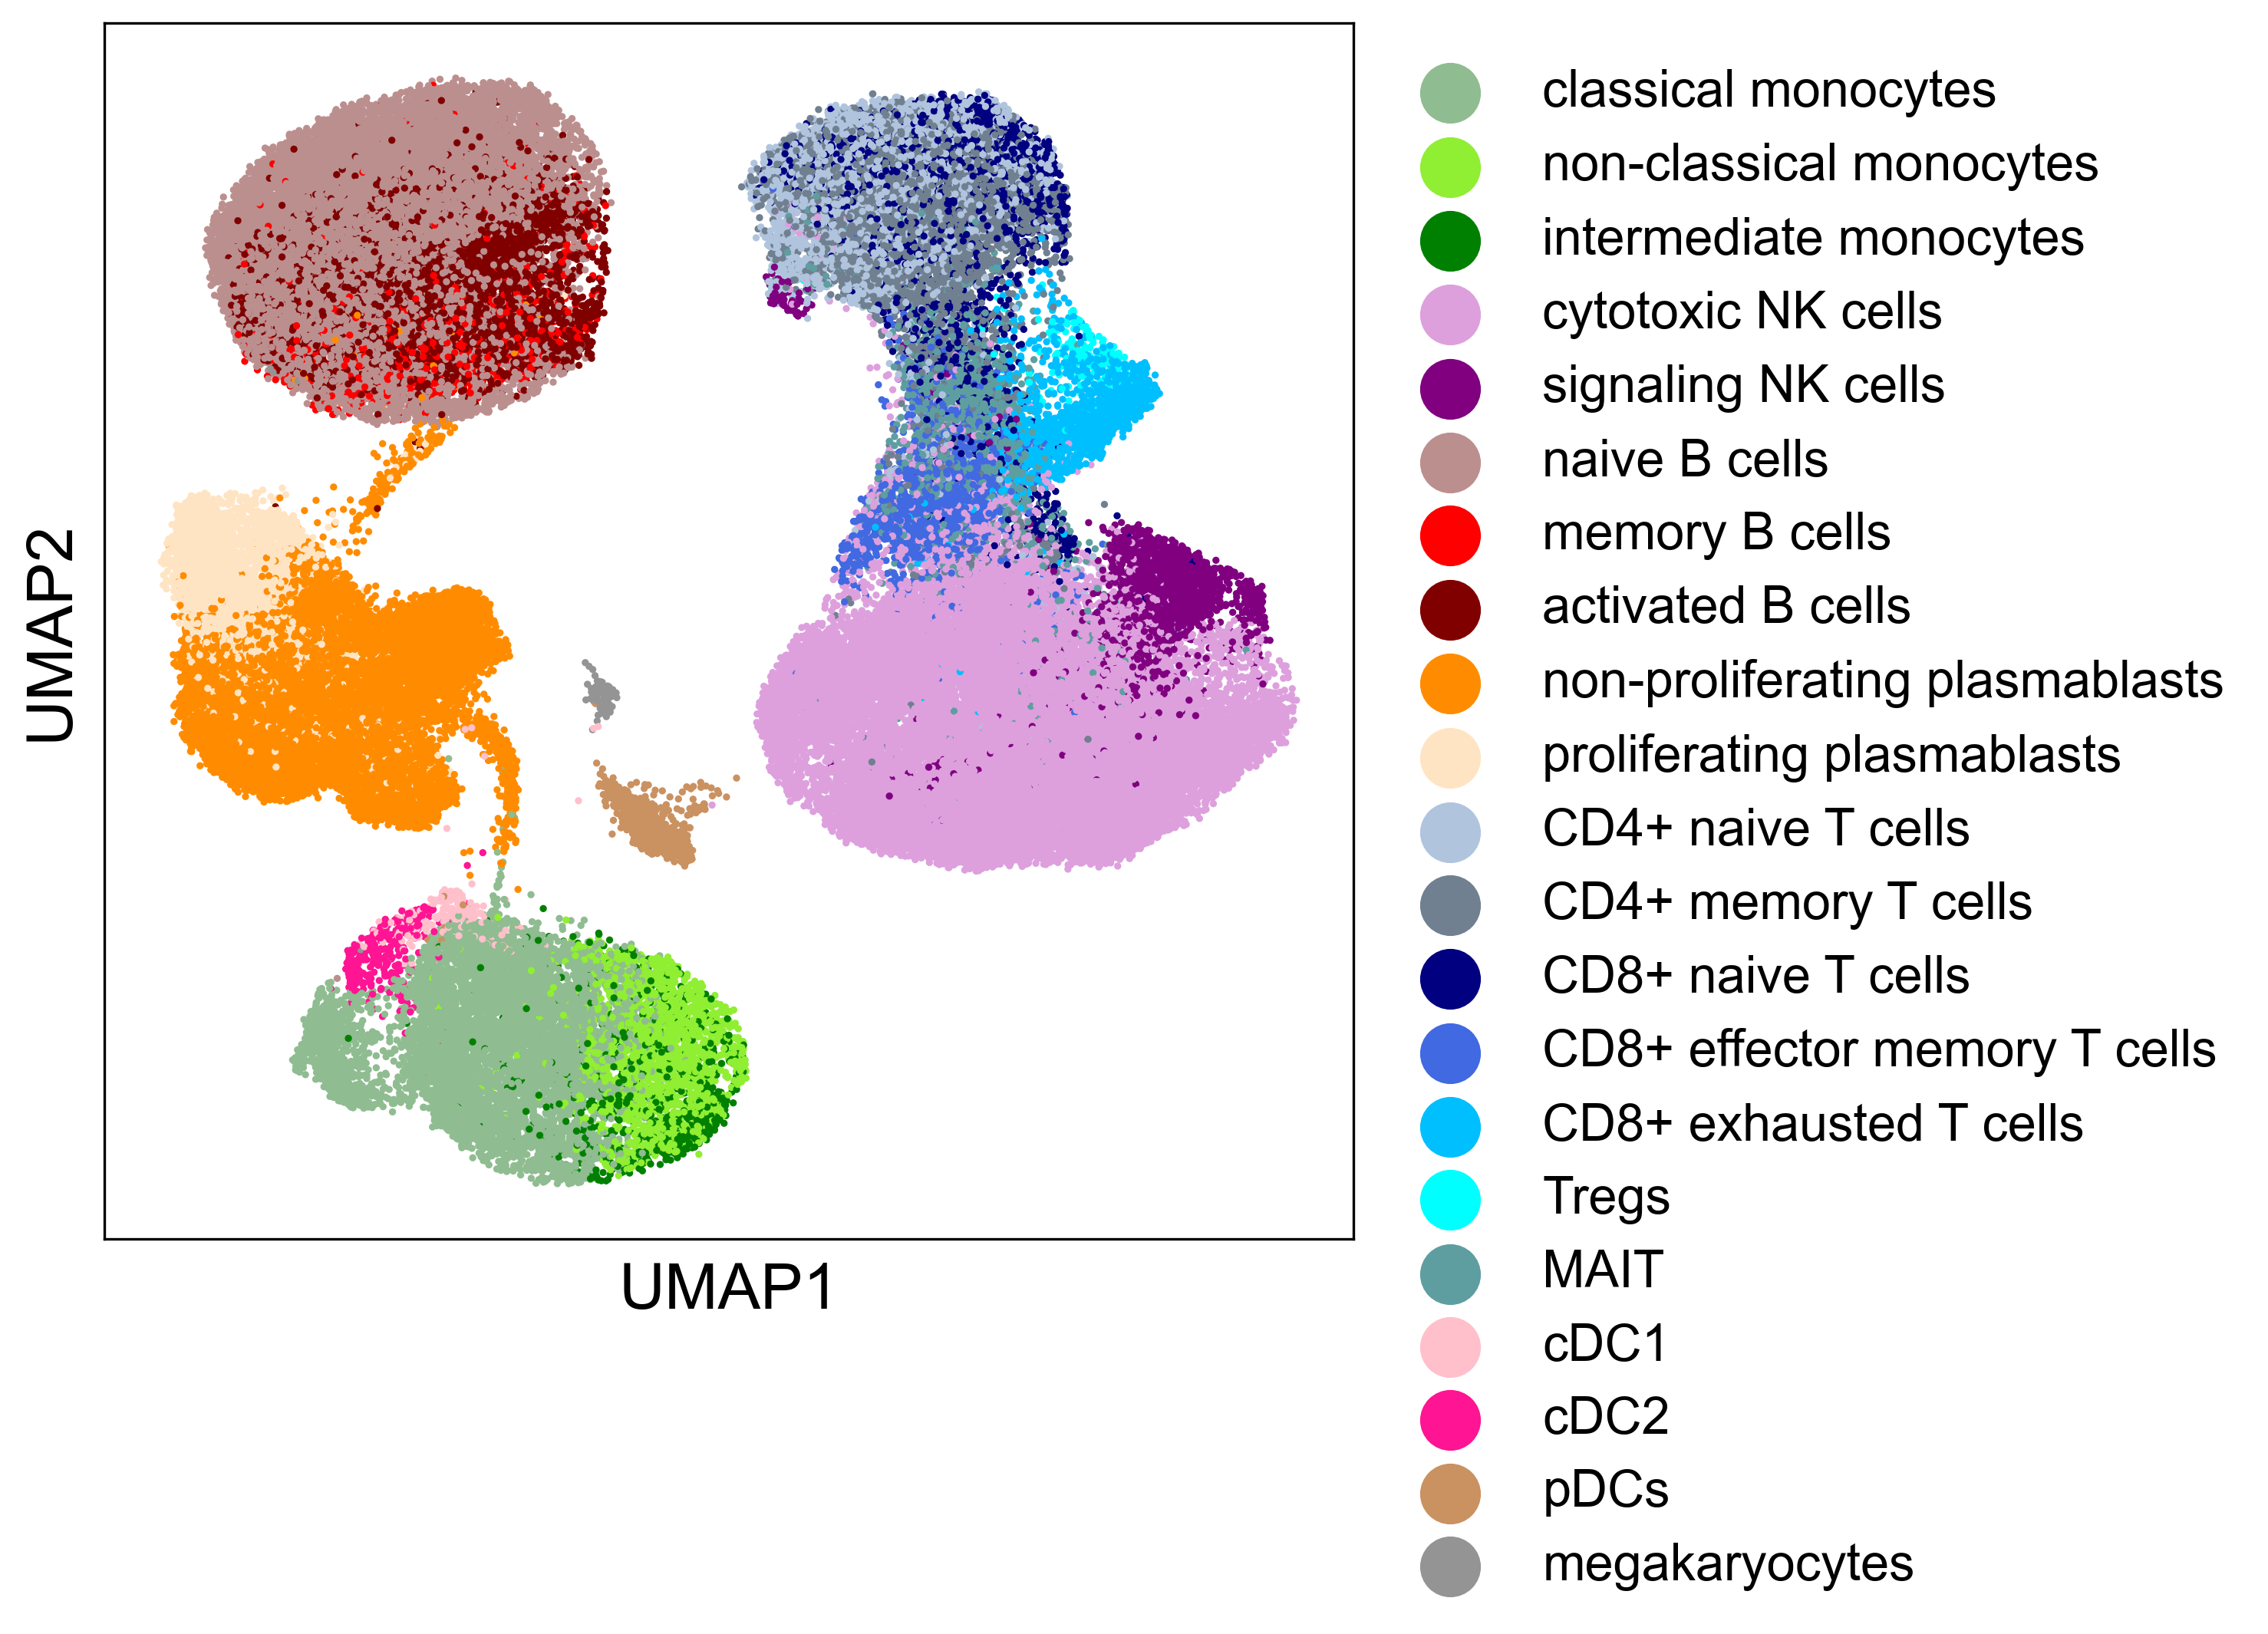

In [45]:
#Figure 1C, umap

# cmap_ct = sns.color_palette([ct_palette[ct] for ct in cell_types])
# umap_plot(adata_kid, save_figures, 'cell_type_new', cmap_ct, '', 'png')
# umap_plot(adata_kid, save_figures, 'cell_type_new', cmap_ct, '', 'pdf')

# umap_plot(adata_kid, save_figures, 'cell_type_new', cmap_ct, '', 'ant.png', annotation=True)
# umap_plot(adata_kid, save_figures, 'cell_type_new', cmap_ct, '', 'ant.pdf', annotation=True)

cmap_cst = sns.color_palette([cst_palette[cst] for cst in cell_subtypes])
umap_plot(adata_kid, save_figures, 'cell_subtype_new', cmap_cst, '', 'png')
# umap_plot(adata_kid, save_figures, 'cell_subtype_new', cmap_cst, '', 'pdf')

# umap_plot(adata_kid, save_figures, 'cell_subtype_new', cmap_cst, '', 'ant.png', annotation=True)
# umap_plot(adata_kid, save_figures, 'cell_subtype_new', cmap_cst, '', 'ant.pdf', annotation=True)